In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 


from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:

cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

df['target'] = cancer.target

print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [7]:
X = df.drop(columns=['target'])  
y = df['target']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")


Explained Variance Ratio: [0.44272026 0.18971182]


In [22]:

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

print(pca_df.head())

        PC1        PC2  target
0  9.192837   1.948583       0
1  2.387802  -3.768172       0
2  5.733896  -1.075174       0
3  7.122953  10.275589       0
4  3.935302  -1.948072       0


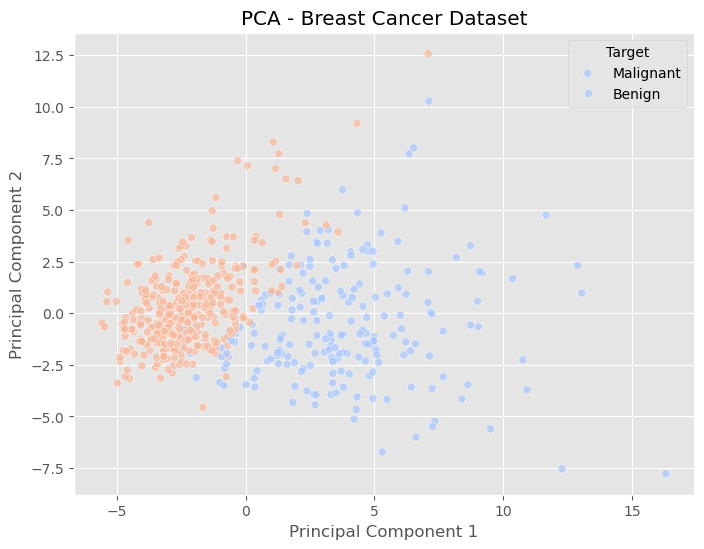

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['target'], palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Breast Cancer Dataset')
plt.legend(title='Target', labels=['Malignant', 'Benign'])
plt.show()



In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.99
